# HW4 DSB
## by: Fares Ghazzawi 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import normaltest 
from scipy.stats import ttest_ind

In [2]:
df = pd.read_csv('marketing_campaign.csv')

In [3]:
df.head()

,Unnamed: 0,MarketSize,LocationID,Promotion,week,SalesInThousands,StoreAge
0,0,Medium,1,3,1,40.476,<=10 years
1,1,Medium,1,3,2,42.804,<=10 years
2,2,Medium,1,3,3,34.836,<=10 years
3,3,Medium,1,3,4,47.100,<=10 years
4,4,Medium,2,2,1,27.810,<=10 years


In [4]:
df.drop(columns=df.columns[0], 
        axis=1, 
        inplace=True)

In [5]:
df.head()

,MarketSize,LocationID,Promotion,week,SalesInThousands,StoreAge
0,Medium,1,3,1,40.476,<=10 years
1,Medium,1,3,2,42.804,<=10 years
2,Medium,1,3,3,34.836,<=10 years
3,Medium,1,3,4,47.100,<=10 years
4,Medium,2,2,1,27.810,<=10 years


### 1. What is the median sales (SalesInThousands)?

In [6]:
df['SalesInThousands'].median()

53.62599999999999

### 2.Compute median sales in markets of different size (MarketSize). Markets of which size have the smallest median sales?

In [7]:
df.groupby('MarketSize')['SalesInThousands'].median()

MarketSize
Large     75.450
Medium    47.425
Small     61.420
Name: SalesInThousands, dtype: float64

### 3. To select best promotion strategy marketing team ran three promotion strategies (Promotion) for 4 weeks (week). Is there a more than 5% difference between average sales in Large markets across 4 weeks ? (In Orange you could select Rows by condition using Select Rows operator, the difference could be computed manually)

i did not understand the question here fully , thus , i devided the answer into two part:
first part : check for each strategy the diffrence between average sales on 1st and 4th week
second part : calculate the diffrence on between the 4 weeks

##### first part

In [8]:
tmp = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 1) & (df['week'] == 1), 'SalesInThousands'].mean()
print (tmp)

75.04214285714286


In [9]:
tmp2 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 1) & (df['week'] == 4), 'SalesInThousands'].mean()
print (tmp2)

77.21142857142857


In [10]:
print (((tmp2 -tmp)/tmp2)*100)

2.8095396684428557


In [11]:
tmp = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 2) & (df['week'] == 1), 'SalesInThousands'].mean()
print (tmp)

60.40500000000001


In [12]:
tmp2 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 2) & (df['week'] == 4), 'SalesInThousands'].mean()
print (tmp2)

59.7875


In [13]:
print (((tmp2 -tmp)/tmp2)*100)

-1.0328245870792503


In [14]:
tmp = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 3) & (df['week'] == 1), 'SalesInThousands'].mean()
print (tmp)

87.65625


In [15]:
tmp2 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['Promotion'] == 3) & (df['week'] == 4), 'SalesInThousands'].mean()
print (tmp2)

84.14633333333335


In [16]:
print (((tmp2 -tmp)/tmp2)*100)

-4.171205717024693


##### second part 

In [17]:
week1 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['week'] == 1), 'SalesInThousands'].mean()
print (week1)

73.07011904761904


In [18]:
week2 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['week'] == 2), 'SalesInThousands'].mean()
print (week2)

70.82069047619048


In [19]:
week3 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['week'] == 3), 'SalesInThousands'].mean()
print (week3)

72.84426190476186


In [20]:
week4 = df.loc[(df['MarketSize'] == 'Large') & 
       (df['week'] == 4), 'SalesInThousands'].mean()
print (week4)

72.55514285714284


In [21]:
print (((week3 -week2)/week3)*100)

2.7779421132951376


In [22]:
print (((week4 -week2)/week4)*100)

2.3905298958164902


In [23]:
print (((week1 -week2)/week1)*100)

3.0784520413366745


### 4.Which market size are the most important when selecting a promotion strategy? Compute total sales in markets of different size.

In [24]:
df.groupby('MarketSize')['SalesInThousands'].agg(['sum'])

,sum
MarketSize,
Large,12150.189
Medium,15130.188
Small,4046.185


### 5. Using bootstrap method sales team prepared 1000 samples of average sales in markets of Medium size (bootstrapped_means.csv). Help them estimate 99.5% confidence (two-sided) interval for average sales. (e.g. use `PERCENTILE` in google spreadsheets) 

In [40]:
bo_df = pd.read_csv('bootstrapped_means.csv')

In [41]:
bo_df.head()

,AverageSales,BootstrapID
0,46.894525,0
1,47.915681,1
2,48.206869,2
3,48.254650,3
4,47.017113,4


In [42]:
def plot_hist_manual(data, bins=30, width=2):
    heights, means = np.histogram(data, bins=bins)
    plt.bar(means[:-1], heights, width=width);

In [43]:
d =np.array(bo_df['AverageSales']) 

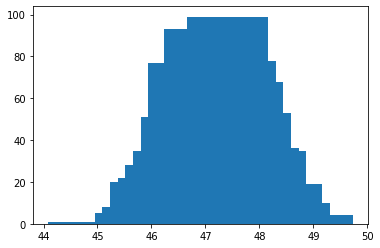

In [44]:
plot_hist_manual(d, width=1.5)

In [45]:
result = normaltest(d)

In [46]:
lv =np.quantile(d, 0.05)
print (round(lv,2)) 

46.23


In [47]:
uv =np.quantile(d, 0.95)
print (round (uv,2))

48.3


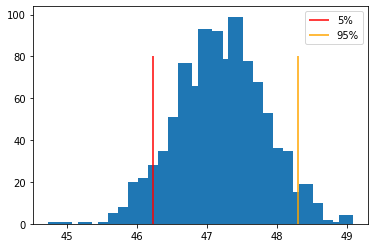

In [48]:
plot_hist_manual(np.array(bo_df['AverageSales']), bins=30, width=0.2)

ax = plt.gca()
ax.vlines(lv, 0, 80, color='r', label='5%')
ax.vlines(uv, 0, 80, color='orange', label='95%')
plt.legend();

### 6. Compare sales in markets where different promotions were ran. Which promotion strategy showed the best results in terms of average sales?

In [49]:
df.groupby('Promotion')['SalesInThousands'].mean()

Promotion
1    61.596831
2    47.329415
3    62.946686
Name: SalesInThousands, dtype: float64

### 7.Are the differences between strategies 1 and 2 statistically significant? Use two-sided Student T-test with confidence level 5%. 

In [50]:
alpha = 0.05

In [55]:
strat1 = df.loc[df['Promotion'] == 1, 'SalesInThousands']
#print (strat1)
print (list (strat1))

[44.54, 37.94, 45.49, 34.75, 42.92, 42.16, 51.72, 36.17, 37.41, 38.64, 40.9, 41.11, 35.85, 36.24, 41.73, 37.32, 50.48, 36.88, 35.68, 46.45, 101.22, 98.355, 102.63, 91.395, 88.73, 85.21, 81.55, 94.17, 93.71, 96.01, 93.03, 97.61, 85.11, 88.07, 94.43, 89.44, 91.6, 80.61, 93.86, 83.43, 99.65, 88.64, 86.96, 89.25, 87.08, 89.32, 99.12, 85.85, 93.32, 85.71, 77.36, 91.29, 83.91, 92.04, 84.285, 93.09, 81.015, 95.22, 92.94, 82.94999999999999, 80.685, 100.44, 85.65, 97.68, 93.24, 81.09, 77.58, 89.46000000000001, 49.95, 55.11, 55.28, 54.7, 59.34, 62.63, 49.08, 58.04, 42.16, 36.8, 46.98, 47.35, 40.46, 41.25, 32.05, 47.5, 35.3, 35.86, 49.3, 30.81, 44.98, 41.71, 41.1, 40.97, 41.1, 41.56, 36.39, 39.67, 53.38, 55.31, 56.1, 43.24, 48.18, 43.11, 43.78, 56.9, 53.53, 47.92, 56.18, 46.66, 42.76, 50.52, 56.86, 47.51, 51.82, 45.02, 49.44, 51.32, 52.85, 40.84, 64.45, 44.43, 56.64, 46.06, 55.46, 51.41, 56.99, 45.57, 45.92, 50.52, 54.95, 55.78, 46.49, 56.84, 65.11, 54.38, 57.14, 49.91, 50.54, 58.43, 59.77, 60.44

In [56]:
strat2 = df.loc[df['Promotion'] == 2, 'SalesInThousands']
#print (strat2)
print (list(strat2))

[27.81, 34.67, 27.98, 27.72, 39.28, 39.8, 24.77, 30.98, 30.37, 24.82, 37.47, 23.35, 30.08, 28.62, 25.4, 27.26, 34.27, 29.3, 23.93, 35.16, 87.43, 81.79, 88.12, 75.29, 88.64, 81.37, 82.14, 79.64, 73.22, 75.88, 78.01, 80.17, 82.65, 77.39, 80.83, 80.75, 66.22, 82.86, 83.4, 75.61, 79.53, 74.03, 78.53, 76.71, 49.61, 43.69, 54.49, 61.25, 47.89, 52.37, 49.11, 52.88, 46.98, 53.41, 36.17, 55.98, 51.87, 58.01, 47.93, 51.33, 40.4, 50.28, 52.72, 38.3, 51.79, 42.56, 44.64, 45.11, 42.15, 42.59, 49.56, 39.25, 48.18, 48.25, 46.42, 43.77, 45.3, 48.84, 45.08, 44.67, 47.33, 45.42, 44.31, 40.26, 43.27, 48.33, 44.14, 51.5, 46.26, 47.71, 54.09, 46.89, 31.94, 29.64, 33.64, 36.05, 36.7, 41.53, 27.71, 37.2, 32.21, 38.41, 37.9, 44.84, 37.45, 35.46, 31.85, 19.26, 38.65, 17.34, 33.14, 23.44, 32.77, 30.26, 27.55, 27.37, 40.71, 38.26, 41.44, 25.7, 49.39, 40.25, 42.46, 31.62, 38.56, 37.29, 35.6, 33.35, 48.5, 36.8, 48.32, 41.54, 32.61, 57.27, 37.32, 41.22, 39.73, 50.3, 40.16, 41.37, 48.76, 44.14, 58.1, 44.16, 46.02, 5

In [57]:
result  = ttest_ind(strat1, strat2)
print (result)

Ttest_indResult(statistic=7.761907735013977, pvalue=8.85304097461179e-14)


In [58]:
if (result.pvalue > alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 2")
  else:
    print ("promotion 2 is better than promotion 1")


stastically significant
promotion 1 is better than promotion 2


### 8. Are the differences between strategies 1 and 3 statistically significant? Use two-sided Student T-test with confidence level 5%. Which strategy should we select?

In [59]:
alpha = 0.05

In [60]:
strat1 = df.loc[df['Promotion'] == 1, 'SalesInThousands']
print (list (strat1))

[44.54, 37.94, 45.49, 34.75, 42.92, 42.16, 51.72, 36.17, 37.41, 38.64, 40.9, 41.11, 35.85, 36.24, 41.73, 37.32, 50.48, 36.88, 35.68, 46.45, 101.22, 98.355, 102.63, 91.395, 88.73, 85.21, 81.55, 94.17, 93.71, 96.01, 93.03, 97.61, 85.11, 88.07, 94.43, 89.44, 91.6, 80.61, 93.86, 83.43, 99.65, 88.64, 86.96, 89.25, 87.08, 89.32, 99.12, 85.85, 93.32, 85.71, 77.36, 91.29, 83.91, 92.04, 84.285, 93.09, 81.015, 95.22, 92.94, 82.94999999999999, 80.685, 100.44, 85.65, 97.68, 93.24, 81.09, 77.58, 89.46000000000001, 49.95, 55.11, 55.28, 54.7, 59.34, 62.63, 49.08, 58.04, 42.16, 36.8, 46.98, 47.35, 40.46, 41.25, 32.05, 47.5, 35.3, 35.86, 49.3, 30.81, 44.98, 41.71, 41.1, 40.97, 41.1, 41.56, 36.39, 39.67, 53.38, 55.31, 56.1, 43.24, 48.18, 43.11, 43.78, 56.9, 53.53, 47.92, 56.18, 46.66, 42.76, 50.52, 56.86, 47.51, 51.82, 45.02, 49.44, 51.32, 52.85, 40.84, 64.45, 44.43, 56.64, 46.06, 55.46, 51.41, 56.99, 45.57, 45.92, 50.52, 54.95, 55.78, 46.49, 56.84, 65.11, 54.38, 57.14, 49.91, 50.54, 58.43, 59.77, 60.44

In [61]:
strat3 = df.loc[df['Promotion'] == 3, 'SalesInThousands']
print (list(strat3))

[40.47599999999999, 42.804, 34.836, 47.1, 39.48, 26.616, 51.57599999999999, 32.016, 40.104, 45.516, 40.62, 48.3, 61.59, 63.64, 54.68, 61.24, 62.93, 58.77, 70.6, 65.06, 59.76, 66.11, 62.16, 64.04, 59.65, 57.04, 59.73, 56.72, 58.55, 62.19, 53.14, 62.27, 94.754, 90.81600000000002, 87.296, 84.88700000000001, 98.67000000000002, 86.27300000000001, 92.455, 89.29800000000002, 91.322, 99.33, 93.69800000000002, 98.747, 90.904, 91.179, 90.343, 97.801, 96.47, 89.27600000000001, 89.738, 103.631, 106.128, 92.543, 101.178, 89.89200000000001, 92.77400000000002, 96.69, 83.73200000000001, 90.992, 104.379, 82.22500000000001, 102.993, 88.902, 100.771, 86.922, 94.721, 91.168, 51.47, 53.47, 46.83, 56.7, 62.676, 62.016, 55.464, 55.236, 54.672, 66.228, 45.408, 60.084, 60.132, 66.708, 65.244, 62.292, 68.844, 66.636, 61.392, 68.472, 60.708, 58.368, 60.66, 58.896, 29.7, 49.764, 42.12, 41.196, 44.604, 36.624, 39.01199999999999, 34.944, 56.97599999999999, 47.292, 51.948, 51.108, 41.352, 48.156, 38.616, 52.47599999

In [62]:
result  = ttest_ind(strat1, strat3)
print (result)

Ttest_indResult(statistic=-0.6963281649703501, pvalue=0.4866751758880089)


In [63]:
print (round(result.pvalue,2))

0.49


In [64]:
if (round(result.pvalue,2) > alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 2")
  else:
    print ("promotion 2 is better than promotion 1")


stastically equivalent 


### 9. Compare the sales for strategies 1 and 3 but now for markets of different size separatly. Compare Large markets with strategies 1 and 3. Compare Medium markets with strategies 1 and 3. Compare Small markets with strategies 1 and 3. Are the differences between strategies 1 and 3 stratified by markets of different size statistically significant (5%), which strategy should we select?

##### Large markets

In [65]:
alpha = 0.05

In [66]:
strat1_L = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Large'), 'SalesInThousands']
print (len(strat1_L))

56


In [67]:
strat3_L = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Large'), 'SalesInThousands']
print (len(strat3_L))

48


In [68]:
result  = ttest_ind(strat1_L, strat3_L)
print (result)


Ttest_indResult(statistic=-3.1460147617621512, pvalue=0.00216943975023725)


In [69]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on large market")
  else:
    print ("promotion 3 is better than promotion 1 on large market")
  if (strat1_L.mean() > strat3_L.mean()):
    print ("promotion 1 is better than promotion 3 on large market")
  else:
    print ("promotion 3 is better than promotion 1 on large market")


stastically significant
promotion 3 is better than promotion 1 on large market
promotion 3 is better than promotion 1 on large market


##### Medium markets

In [70]:
strat1_M = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Medium'), 'SalesInThousands']
print (len(strat1_M))

96


In [71]:
strat3_M = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Medium'), 'SalesInThousands']
print (len(strat3_M))

116


In [72]:
result  = ttest_ind(strat1_M, strat3_M)
print (result)

Ttest_indResult(statistic=-5.546126944655512, pvalue=8.726919451850998e-08)


In [73]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on Medium market")
  else:
    print ("promotion 3 is better than promotion 1 on Medium market")
  if (strat1_M.mean() > strat3_M.mean()):
    print ("promotion 1 is better than promotion 3 on Medium market")
  else:
    print ("promotion 3 is better than promotion 1 on Medium market")


stastically significant
promotion 3 is better than promotion 1 on Medium market
promotion 3 is better than promotion 1 on Medium market


##### Small markets

In [74]:
strat1_s = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Small'), 'SalesInThousands']
print (len(strat1_s))

20


In [75]:
strat3_s = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Small'), 'SalesInThousands']
print (len(strat3_s))

24


In [76]:
result  = ttest_ind(strat1_s, strat3_s)
print (result)

Ttest_indResult(statistic=15.729103026221384, pvalue=3.286527960169143e-19)


In [77]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on Small market")
  else:
    print ("promotion 3 is better than promotion 1 on Small market")
  if (strat1_s.mean() > strat3_s.mean()):
    print ("promotion 1 is better than promotion 3 on Small market")
  else:
    print ("promotion 3 is better than promotion 1 on Small market")

stastically significant
promotion 1 is better than promotion 3 on Small market
promotion 1 is better than promotion 3 on Small market


### 10. If instead of running promotions for 4 weeks we have only ran it for 1 week, does your answer to the previous question change? If we now look for confidence level 10%?

Note : run the following code for alpha = 0.1 first then for alpha = 0.05 to compare 

In [78]:
alpha = 0.1

In [91]:
alpha = 0.05 

##### large markets

In [92]:
strat1_L_w1 = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Large') & (df['week']== 1), 'SalesInThousands']
print (len(strat1_L_w1))

14


In [93]:
strat3_L_w1 = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Large') & (df['week']== 1), 'SalesInThousands']
print (len(strat3_L_w1))

12


In [94]:
result  = ttest_ind(strat1_L_w1, strat3_L_w1)
print (result)

Ttest_indResult(statistic=-1.7931023723764705, pvalue=0.08556982681378379)


In [95]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on Large market")
  else:
    print ("promotion 3 is better than promotion 1 on Large market")
  if (strat1_L_w1.mean() > strat3_L_w1.mean()):
    print ("promotion 1 is better than promotion 3 on Large market")
  else:
    print ("promotion 3 is better than promotion 1 on Large market")

stastically equivalent 


##### Medium markets

In [96]:
strat1_M_w1 = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Medium') & (df['week']== 1), 'SalesInThousands']
print (len(strat1_M_w1))

24


In [97]:
strat3_M_w1 = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Medium') & (df['week']== 1), 'SalesInThousands']
print (len(strat3_M_w1))

29


In [98]:
result  = ttest_ind(strat1_M_w1, strat3_M_w1)
print (result)

Ttest_indResult(statistic=-2.434484067162056, pvalue=0.01845222033396582)


In [99]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on Medium market")
  else:
    print ("promotion 3 is better than promotion 1 on Medium market")
  if (strat3_M_w1.mean() > strat3_M_w1.mean()):
    print ("promotion 1 is better than promotion 3 on Medium market")
  else:
    print ("promotion 3 is better than promotion 1 on Medium market")

stastically significant
promotion 3 is better than promotion 1 on Medium market
promotion 3 is better than promotion 1 on Medium market


##### Small Markets

In [100]:
strat1_S_w1 = df.loc[(df['Promotion'] == 1) & (df['MarketSize'] == 'Small') & (df['week']== 1), 'SalesInThousands']
print (len(strat1_S_w1))

5


In [101]:
strat3_S_w1 = df.loc[(df['Promotion'] == 3) & (df['MarketSize'] == 'Small') & (df['week']== 1), 'SalesInThousands']
print (len(strat3_S_w1))

6


In [102]:
result  = ttest_ind(strat1_S_w1, strat3_S_w1)
print (result)

Ttest_indResult(statistic=7.177589277766924, pvalue=5.208042684076091e-05)


In [103]:
if (result.pvalue> alpha):
  print ("stastically equivalent ")
else:
  print ("stastically significant")
  if (result.statistic > 0):
    print ("promotion 1 is better than promotion 3 on Small market")
  else:
    print ("promotion 3 is better than promotion 1 on Small market")
  if (strat1_S_w1.mean() > strat3_S_w1.mean()):
    print ("promotion 1 is better than promotion 3 on Small market")
  else:
    print ("promotion 3 is better than promotion 1 on Small market")

stastically significant
promotion 1 is better than promotion 3 on Small market
promotion 1 is better than promotion 3 on Small market
